In [3]:

from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName('WeatherDataProcessing').getOrCreate()

In [5]:
df = spark.read.csv(r'C:\Users\aravi\Desktop\Assignment\GlobalWeatherRepository.csv', header=True, inferSchema=True)

In [6]:
df.printSchema()

root
 |-- country: string (nullable = true)
 |-- location_name: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- timezone: string (nullable = true)
 |-- last_updated_epoch: integer (nullable = true)
 |-- last_updated: timestamp (nullable = true)
 |-- temperature_celsius: double (nullable = true)
 |-- temperature_fahrenheit: double (nullable = true)
 |-- condition_text: string (nullable = true)
 |-- wind_mph: double (nullable = true)
 |-- wind_kph: double (nullable = true)
 |-- wind_degree: integer (nullable = true)
 |-- wind_direction: string (nullable = true)
 |-- pressure_mb: double (nullable = true)
 |-- pressure_in: double (nullable = true)
 |-- precip_mm: double (nullable = true)
 |-- precip_in: double (nullable = true)
 |-- humidity: integer (nullable = true)
 |-- cloud: integer (nullable = true)
 |-- feels_like_celsius: double (nullable = true)
 |-- feels_like_fahrenheit: double (nullable = true)
 |-- visibility_km: d

In [7]:
from pyspark.sql.functions import to_date, col

In [8]:
df = df.withColumn('date_only', to_date(col('last_updated')))

In [9]:
df.show()

+-------------------+----------------+--------+---------+--------------------+------------------+-------------------+-------------------+----------------------+--------------------+--------+--------+-----------+--------------+-----------+-----------+---------+---------+--------+-----+------------------+---------------------+-------------+----------------+--------+--------+--------+---------------------------+-----------------+----------------------------+---------------------------+-----------------+----------------+------------------------+--------------------------+--------+--------+--------+----------+--------------+-----------------+----------+
|            country|   location_name|latitude|longitude|            timezone|last_updated_epoch|       last_updated|temperature_celsius|temperature_fahrenheit|      condition_text|wind_mph|wind_kph|wind_degree|wind_direction|pressure_mb|pressure_in|precip_mm|precip_in|humidity|cloud|feels_like_celsius|feels_like_fahrenheit|visibility_km|vis

In [10]:
df.printSchema()

root
 |-- country: string (nullable = true)
 |-- location_name: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- timezone: string (nullable = true)
 |-- last_updated_epoch: integer (nullable = true)
 |-- last_updated: timestamp (nullable = true)
 |-- temperature_celsius: double (nullable = true)
 |-- temperature_fahrenheit: double (nullable = true)
 |-- condition_text: string (nullable = true)
 |-- wind_mph: double (nullable = true)
 |-- wind_kph: double (nullable = true)
 |-- wind_degree: integer (nullable = true)
 |-- wind_direction: string (nullable = true)
 |-- pressure_mb: double (nullable = true)
 |-- pressure_in: double (nullable = true)
 |-- precip_mm: double (nullable = true)
 |-- precip_in: double (nullable = true)
 |-- humidity: integer (nullable = true)
 |-- cloud: integer (nullable = true)
 |-- feels_like_celsius: double (nullable = true)
 |-- feels_like_fahrenheit: double (nullable = true)
 |-- visibility_km: d

In [11]:
df = df.withColumn("date", df["date_only"].cast("date"))

In [12]:
from pyspark.sql.functions import year
df = df.withColumn("year", year(df["date_only"]))

In [13]:
df.show()

+-------------------+----------------+--------+---------+--------------------+------------------+-------------------+-------------------+----------------------+--------------------+--------+--------+-----------+--------------+-----------+-----------+---------+---------+--------+-----+------------------+---------------------+-------------+----------------+--------+--------+--------+---------------------------+-----------------+----------------------------+---------------------------+-----------------+----------------+------------------------+--------------------------+--------+--------+--------+----------+--------------+-----------------+----------+----------+----+
|            country|   location_name|latitude|longitude|            timezone|last_updated_epoch|       last_updated|temperature_celsius|temperature_fahrenheit|      condition_text|wind_mph|wind_kph|wind_degree|wind_direction|pressure_mb|pressure_in|precip_mm|precip_in|humidity|cloud|feels_like_celsius|feels_like_fahrenheit|v

In [14]:
df.printSchema()

root
 |-- country: string (nullable = true)
 |-- location_name: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- timezone: string (nullable = true)
 |-- last_updated_epoch: integer (nullable = true)
 |-- last_updated: timestamp (nullable = true)
 |-- temperature_celsius: double (nullable = true)
 |-- temperature_fahrenheit: double (nullable = true)
 |-- condition_text: string (nullable = true)
 |-- wind_mph: double (nullable = true)
 |-- wind_kph: double (nullable = true)
 |-- wind_degree: integer (nullable = true)
 |-- wind_direction: string (nullable = true)
 |-- pressure_mb: double (nullable = true)
 |-- pressure_in: double (nullable = true)
 |-- precip_mm: double (nullable = true)
 |-- precip_in: double (nullable = true)
 |-- humidity: integer (nullable = true)
 |-- cloud: integer (nullable = true)
 |-- feels_like_celsius: double (nullable = true)
 |-- feels_like_fahrenheit: double (nullable = true)
 |-- visibility_km: d

In [15]:
df.select("year").show()

+----+
|year|
+----+
|2024|
|2024|
|2024|
|2024|
|2024|
|2024|
|2024|
|2024|
|2024|
|2024|
|2024|
|2024|
|2024|
|2024|
|2024|
|2024|
|2024|
|2024|
|2024|
|2024|
+----+
only showing top 20 rows



In [16]:
from pyspark.sql.functions import month
df = df.withColumn("month", month(df["date"]))

In [17]:
df.select("month").show()

+-----+
|month|
+-----+
|    5|
|    5|
|    5|
|    5|
|    5|
|    5|
|    5|
|    5|
|    5|
|    5|
|    5|
|    5|
|    5|
|    5|
|    5|
|    5|
|    5|
|    5|
|    5|
|    5|
+-----+
only showing top 20 rows



In [18]:
from pyspark.sql.functions import dayofmonth
df = df.withColumn("day", dayofmonth(df["date"]))

In [19]:
df.select("date", "day").show()

+----------+---+
|      date|day|
+----------+---+
|2024-05-16| 16|
|2024-05-16| 16|
|2024-05-16| 16|
|2024-05-16| 16|
|2024-05-16| 16|
|2024-05-16| 16|
|2024-05-16| 16|
|2024-05-16| 16|
|2024-05-16| 16|
|2024-05-16| 16|
|2024-05-16| 16|
|2024-05-16| 16|
|2024-05-16| 16|
|2024-05-16| 16|
|2024-05-16| 16|
|2024-05-16| 16|
|2024-05-16| 16|
|2024-05-16| 16|
|2024-05-16| 16|
|2024-05-16| 16|
+----------+---+
only showing top 20 rows



In [20]:
df.printSchema()

root
 |-- country: string (nullable = true)
 |-- location_name: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- timezone: string (nullable = true)
 |-- last_updated_epoch: integer (nullable = true)
 |-- last_updated: timestamp (nullable = true)
 |-- temperature_celsius: double (nullable = true)
 |-- temperature_fahrenheit: double (nullable = true)
 |-- condition_text: string (nullable = true)
 |-- wind_mph: double (nullable = true)
 |-- wind_kph: double (nullable = true)
 |-- wind_degree: integer (nullable = true)
 |-- wind_direction: string (nullable = true)
 |-- pressure_mb: double (nullable = true)
 |-- pressure_in: double (nullable = true)
 |-- precip_mm: double (nullable = true)
 |-- precip_in: double (nullable = true)
 |-- humidity: integer (nullable = true)
 |-- cloud: integer (nullable = true)
 |-- feels_like_celsius: double (nullable = true)
 |-- feels_like_fahrenheit: double (nullable = true)
 |-- visibility_km: d

In [21]:
df.select("precip_mm").show()

+---------+
|precip_mm|
+---------+
|      0.0|
|      0.1|
|      0.0|
|      0.3|
|      0.0|
|     0.02|
|      0.0|
|     0.13|
|      0.0|
|      0.0|
|      0.0|
|      0.0|
|      0.0|
|      0.0|
|      0.0|
|      0.0|
|     0.25|
|      0.0|
|     0.02|
|     0.16|
+---------+
only showing top 20 rows



In [22]:
df.select("temperature_fahrenheit").show()

+----------------------+
|temperature_fahrenheit|
+----------------------+
|                  79.8|
|                  66.2|
|                  73.4|
|                  43.3|
|                  78.8|
|                  78.8|
|                  46.4|
|                  66.2|
|                  48.2|
|                  60.8|
|                  62.6|
|                  80.6|
|                  96.8|
|                 101.2|
|                  82.4|
|                  62.6|
|                  59.0|
|                  78.9|
|                  82.4|
|                  64.8|
+----------------------+
only showing top 20 rows



In [23]:
from pyspark.sql.types import FloatType
df = df.withColumn("precip_in", df["precip_in"].cast(FloatType()))

In [24]:
df.printSchema()

root
 |-- country: string (nullable = true)
 |-- location_name: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- timezone: string (nullable = true)
 |-- last_updated_epoch: integer (nullable = true)
 |-- last_updated: timestamp (nullable = true)
 |-- temperature_celsius: double (nullable = true)
 |-- temperature_fahrenheit: double (nullable = true)
 |-- condition_text: string (nullable = true)
 |-- wind_mph: double (nullable = true)
 |-- wind_kph: double (nullable = true)
 |-- wind_degree: integer (nullable = true)
 |-- wind_direction: string (nullable = true)
 |-- pressure_mb: double (nullable = true)
 |-- pressure_in: double (nullable = true)
 |-- precip_mm: double (nullable = true)
 |-- precip_in: float (nullable = true)
 |-- humidity: integer (nullable = true)
 |-- cloud: integer (nullable = true)
 |-- feels_like_celsius: double (nullable = true)
 |-- feels_like_fahrenheit: double (nullable = true)
 |-- visibility_km: do

In [25]:
df = df.na.fill({"precip_in": 0.0})

In [26]:
df.select("precip_in").show(10)

+---------+
|precip_in|
+---------+
|      0.0|
|      0.0|
|      0.0|
|     0.01|
|      0.0|
|      0.0|
|      0.0|
|     0.01|
|      0.0|
|      0.0|
+---------+
only showing top 10 rows



In [27]:
from pyspark.sql.functions import mean, sum

# Aggregate by month
monthly_data = df.groupBy("year", "month").agg(
    mean("temperature_fahrenheit").alias("avg_temperature"),
    sum("precip_in").alias("total_precipitation")
)

# Select and show the average temperature
#monthly_data.select("avg_temperature").show()


In [28]:
monthly_data.show()

+----+-----+------------------+-------------------+
|year|month|   avg_temperature|total_precipitation|
+----+-----+------------------+-------------------+
|2024|    7| 80.24264468733195|  34.74999968148768|
|2024|    5| 77.27550030321397| 20.219999799504876|
|2024|    6| 79.62250731875338| 34.859999703243375|
|2024|    8|  80.2230934656741|  38.51999959908426|
|2024|    9| 77.22641734972692|  37.29999973252416|
|2024|   10| 72.20408637873754| 28.579999689012766|
|2024|   12| 63.95377998345755|  25.28999970294535|
|2024|   11|  66.9664947567473| 30.089999679476023|
|2025|    1|63.309157509157394| 28.509999683126807|
|2025|    2| 63.07938441808273| 11.769999854266644|
+----+-----+------------------+-------------------+



In [29]:
ordered_monthly_data = monthly_data.orderBy("month")

In [30]:
ordered_monthly_data.show()

+----+-----+------------------+-------------------+
|year|month|   avg_temperature|total_precipitation|
+----+-----+------------------+-------------------+
|2025|    1|63.309157509157394| 28.509999683126807|
|2025|    2| 63.07938441808273| 11.769999854266644|
|2024|    5| 77.27550030321397| 20.219999799504876|
|2024|    6| 79.62250731875338| 34.859999703243375|
|2024|    7| 80.24264468733195|  34.74999968148768|
|2024|    8|  80.2230934656741|  38.51999959908426|
|2024|    9| 77.22641734972692|  37.29999973252416|
|2024|   10| 72.20408637873754| 28.579999689012766|
|2024|   11|  66.9664947567473| 30.089999679476023|
|2024|   12| 63.95377998345755|  25.28999970294535|
+----+-----+------------------+-------------------+



In [31]:

daily_precipitation = df.groupBy("year", "month", "day").agg(
    sum("precip_in").alias("total_precipitation")
)


In [32]:

# Group by year and month and calculate the average temperature and total precipitation
monthly_data = df.groupBy("year", "month").agg(
    mean("temperature_fahrenheit").alias("avg_temperature"),
    sum("precip_in").alias("total_precipitation")
)

# Show the result
monthly_data.show()



+----+-----+------------------+-------------------+
|year|month|   avg_temperature|total_precipitation|
+----+-----+------------------+-------------------+
|2024|    7| 80.24264468733195|  34.74999968148768|
|2024|    5| 77.27550030321397| 20.219999799504876|
|2024|    6| 79.62250731875338| 34.859999703243375|
|2024|    8|  80.2230934656741|  38.51999959908426|
|2024|    9| 77.22641734972692|  37.29999973252416|
|2024|   10| 72.20408637873754| 28.579999689012766|
|2024|   12| 63.95377998345755|  25.28999970294535|
|2024|   11|  66.9664947567473| 30.089999679476023|
|2025|    1|63.309157509157394| 28.509999683126807|
|2025|    2| 63.07938441808273| 11.769999854266644|
+----+-----+------------------+-------------------+



In [33]:
# Daily Aggregation
daily_data = df.groupBy("year", "month", "day").agg(
    mean("temperature_fahrenheit").alias("avg_temperature"),
    sum("precip_in").alias("total_precipitation")
)
daily_data.show()

+----+-----+---+-----------------+-------------------+
|year|month|day|  avg_temperature|total_precipitation|
+----+-----+---+-----------------+-------------------+
|2024|    6|  8|             79.8| 1.3899999968707561|
|2024|    5| 24|77.16051282051282|  1.359999991953373|
|2024|    5| 21|77.69076923076922|  1.099999975413084|
|2024|    6|  3|79.02615384615382| 1.4200000055134296|
|2024|    6| 30|80.44895833333331| 1.1399999912828207|
|2024|    6| 26|80.67305699481864| 0.7699999865144491|
|2024|    7|  5|79.20454545454552|  1.019999984651804|
|2024|    6| 27|80.94923076923077|  1.529999990016222|
|2024|    7|  1|79.65384615384616| 1.2999999821186066|
|2024|    6|  6|79.76994818652852| 0.4599999915808439|
|2024|    6| 28|80.58615384615386| 0.9899999853223562|
|2024|    8|  7|80.10512820512828| 0.8099999874830246|
|2024|    5| 18|77.63658536585362| 0.9999999813735485|
|2024|    5| 23|77.12000000000003| 1.2799999918788671|
|2024|    6| 13|79.70717948717949|  1.080000001937151|
|2024|    

In [34]:
# Convert Spark DataFrame to Pandas DataFrame
pandas_df = df.toPandas()

# Display the Pandas DataFrame
pandas_df


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,sunset,moonrise,moonset,moon_phase,moon_illumination,date_only,date,year,month,day
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55,2024-05-16,2024-05-16,2024,5,16
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45:00,19.0,66.2,Partly cloudy,...,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55,2024-05-16,2024-05-16,2024,5,16
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45:00,23.0,73.4,Sunny,...,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55,2024-05-16,2024-05-16,2024,5,16
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45:00,6.3,43.3,Light drizzle,...,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55,2024-05-16,2024-05-16,2024,5,16
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45:00,26.0,78.8,Partly cloudy,...,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55,2024-05-16,2024-05-16,2024,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53589,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1739700900,2025-02-16 06:15:00,24.3,75.7,Clear,...,06:36 PM,09:53 PM,09:20 AM,Waning Gibbous,88,2025-02-16,2025-02-16,2025,2,16
53590,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1739700900,2025-02-16 17:15:00,16.2,61.2,Light rain,...,05:55 PM,09:06 PM,08:29 AM,Waning Gibbous,91,2025-02-16,2025-02-16,2025,2,16
53591,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1739700900,2025-02-16 13:15:00,23.8,74.8,Sunny,...,06:07 PM,09:18 PM,08:43 AM,Waning Gibbous,90,2025-02-16,2025-02-16,2025,2,16
53592,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1739700900,2025-02-16 12:15:00,22.9,73.3,Patchy rain nearby,...,06:38 PM,09:06 PM,08:59 AM,Waning Gibbous,90,2025-02-16,2025-02-16,2025,2,16


In [35]:
#Check whether there is null values

pandas_df.isnull().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [36]:
#checking for duplicates
duplicates = pandas_df.duplicated()
pandas_df[duplicates]

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,sunset,moonrise,moonset,moon_phase,moon_illumination,date_only,date,year,month,day


In [37]:
#Calculate rolling averages and rolling sums
from pyspark.sql.window import Window
#Define window specifications
windowSpec = Window.orderBy("date").rowsBetween(-2, 0)  # Rolling window of 3 days
from pyspark.sql.functions import avg, sum, col
df_with_rolling_avg = df.withColumn("rolling_avg_temperature", avg("temperature_fahrenheit").over(windowSpec))
df_with_rolling_avg = df_with_rolling_avg.withColumn("rolling_avg_precip", avg("precip_in").over(windowSpec))
df_with_rolling_avg = df_with_rolling_avg.withColumn("rolling_sum_precip", sum("precip_in").over(windowSpec))
df_with_rolling_avg.show()

+-------------------+----------------+--------+---------+--------------------+------------------+-------------------+-------------------+----------------------+--------------------+--------+--------+-----------+--------------+-----------+-----------+---------+---------+--------+-----+------------------+---------------------+-------------+----------------+--------+--------+--------+---------------------------+-----------------+----------------------------+---------------------------+-----------------+----------------+------------------------+--------------------------+--------+--------+--------+----------+--------------+-----------------+----------+----------+----+-----+---+-----------------------+--------------------+--------------------+
|            country|   location_name|latitude|longitude|            timezone|last_updated_epoch|       last_updated|temperature_celsius|temperature_fahrenheit|      condition_text|wind_mph|wind_kph|wind_degree|wind_direction|pressure_mb|pressure_in|p

In [38]:
#calculating statistics
from pyspark.sql.functions import mean, sum, count, min, max
statistics = df.agg(
    mean("temperature_fahrenheit").alias("mean_temperature"),
    sum("temperature_fahrenheit").alias("sum_temperature"),
    count("temperature_fahrenheit").alias("count_temperature"),
    min("temperature_fahrenheit").alias("min_temperature"),
    max("temperature_fahrenheit").alias("max_temperature"),
    mean("precip_in").alias("mean_precipitation"),
    sum("precip_in").alias("sum_precipitation"),
    count("precip_in").alias("count_precipitation"),
    min("precip_in").alias("min_precipitation"),
    max("precip_in").alias("max_precipitation")
)
statistics.show()

+-----------------+------------------+-----------------+---------------+---------------+--------------------+------------------+-------------------+-----------------+-----------------+
| mean_temperature|   sum_temperature|count_temperature|min_temperature|max_temperature|  mean_precipitation| sum_precipitation|count_precipitation|min_precipitation|max_precipitation|
+-----------------+------------------+-----------------+---------------+---------------+--------------------+------------------+-------------------+-----------------+-----------------+
|72.58342165167747|3890035.9000000022|            53594|          -12.8|          120.6|0.005409000953925289|289.88999712467194|              53594|              0.0|             1.66|
+-----------------+------------------+-----------------+---------------+---------------+--------------------+------------------+-------------------+-----------------+-----------------+



In [39]:
from pyspark.sql.functions import col, abs, mean, stddev
# Define a function to calculate Z-score and identify outliers for a given column
def detect_outliers(df, column):
    stats = df.select(mean(col(column)).alias("mean_val"),
                      stddev(col(column)).alias("stddev_val")).first()
   
    mean_val = stats["mean_val"]
    stddev_val = stats["stddev_val"]
   
    df_with_zscore = df.withColumn("z_score", (col(column) - mean_val) / stddev_val)
    outliers = df_with_zscore.filter(abs(col("z_score")) > 3)
    return outliers
 
# Check for outliers in 'temperature_fahrenheit'
outliers_temp = detect_outliers(df, "temperature_fahrenheit")
print("Outliers in temperature_fahrenheit:")
outliers_temp.show()
 
# Check for outliers in 'precip_in'
outliers_precip = detect_outliers(df, "precip_in")
print("Outliers in precip_in:")
outliers_precip.show()

Outliers in temperature_fahrenheit:
+-------------+-------------+--------+---------+----------------+------------------+-------------------+-------------------+----------------------+--------------+--------+--------+-----------+--------------+-----------+-----------+---------+---------+--------+-----+------------------+---------------------+-------------+----------------+--------+--------+--------+---------------------------+-----------------+----------------------------+---------------------------+-----------------+----------------+------------------------+--------------------------+--------+--------+--------+--------+---------------+-----------------+----------+----------+----+-----+---+-------------------+
|      country|location_name|latitude|longitude|        timezone|last_updated_epoch|       last_updated|temperature_celsius|temperature_fahrenheit|condition_text|wind_mph|wind_kph|wind_degree|wind_direction|pressure_mb|pressure_in|precip_mm|precip_in|humidity|cloud|feels_like_cels

In [40]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, abs, mean, stddev, expr
 
 
 
# Function to detect outliers using Z-score
def detect_outliers(df, column):
    stats = df.select(mean(col(column)).alias("mean_val"),
                      stddev(col(column)).alias("stddev_val")).first()
   
    mean_val = stats["mean_val"]
    stddev_val = stats["stddev_val"]
   
    df_with_zscore = df.withColumn("z_score", (col(column) - mean_val) / stddev_val)
    outliers = df_with_zscore.filter(abs(col("z_score")) > 3)
    return outliers, mean_val, stddev_val
 
# Function to replace outliers with median value
def replace_outliers(df, column, mean_val, stddev_val):
    stats = df.selectExpr(f"percentile_approx({column}, 0.5)").collect()
    median_val = stats[0][0]
   
    df_with_replaced = df.withColumn(column,
                                     expr(f"CASE WHEN abs((`{column}` - {mean_val}) / {stddev_val}) > 3 THEN {median_val} ELSE `{column}` END"))
    return df_with_replaced
 
# Detect and replace outliers in 'temperature_fahrenheit'
outliers_temp, mean_val_temp, stddev_val_temp = detect_outliers(df, "temperature_fahrenheit")
df_cleaned = replace_outliers(df, "temperature_fahrenheit", mean_val_temp, stddev_val_temp)
 
# Detect and replace outliers in 'precip_in'
outliers_precip, mean_val_precip, stddev_val_precip = detect_outliers(df_cleaned, "precip_in")
df_cleaned = replace_outliers(df_cleaned, "precip_in", mean_val_precip, stddev_val_precip)
 
# Drop the z_score column
df_cleaned = df_cleaned.drop("z_score")


In [41]:
df1 = spark.read.csv(r'C:\Users\aravi\Desktop\Assignment\cleaned_weather_data.csv', header=True, inferSchema=True)

In [42]:
df1.show()

+-------------------+----------------+--------+---------+--------------------+------------------+-------------------+-------------------+----------------------+--------------------+--------+--------+-----------+--------------+-----------+-----------+---------+--------------------+--------+-----+------------------+---------------------+-------------+----------------+--------+--------+--------+---------------------------+-----------------+----------------------------+---------------------------+-----------------+----------------+------------------------+--------------------------+--------+--------+--------+----------+--------------+-----------------+----------+----------+----+-----+---+
|            country|   location_name|latitude|longitude|            timezone|last_updated_epoch|       last_updated|temperature_celsius|temperature_fahrenheit|      condition_text|wind_mph|wind_kph|wind_degree|wind_direction|pressure_mb|pressure_in|precip_mm|           precip_in|humidity|cloud|feels_like

In [43]:
from pyspark.sql import SparkSession
 
 
 
# Perform an anti-join to find rows in the old dataset that are not in the new dataset
diff_old_to_new = df.join(df1, on=['country'], how='left_anti')
 
# Perform an anti-join to find rows in the new dataset that are not in the old dataset
diff_new_to_old = df1.join(df, on=['country'], how='left_anti')
 
# Show the differences
print("Differences from old to new dataset:")
diff_old_to_new.show()
 
print("Differences from new to old dataset:")
diff_new_to_old.show()

Differences from old to new dataset:
+-------+-------------+--------+---------+--------+------------------+------------+-------------------+----------------------+--------------+--------+--------+-----------+--------------+-----------+-----------+---------+---------+--------+-----+------------------+---------------------+-------------+----------------+--------+--------+--------+---------------------------+-----------------+----------------------------+---------------------------+-----------------+----------------+------------------------+--------------------------+-------+------+--------+-------+----------+-----------------+---------+----+----+-----+---+
|country|location_name|latitude|longitude|timezone|last_updated_epoch|last_updated|temperature_celsius|temperature_fahrenheit|condition_text|wind_mph|wind_kph|wind_degree|wind_direction|pressure_mb|pressure_in|precip_mm|precip_in|humidity|cloud|feels_like_celsius|feels_like_fahrenheit|visibility_km|visibility_miles|uv_index|gust_mph|gu

+----+-----------------+
|year|         avg_temp|
+----+-----------------+
|2024|74.67437990510241|
|2025|64.49001643835615|
+----+-----------------+

+----+-----+-----------------+
|year|month|         avg_temp|
+----+-----+-----------------+
|2025|    1|64.37855477855472|
|2025|    2|64.70464892593793|
|2024|    5|77.27550030321397|
|2024|    6|79.62250731875338|
|2024|    7|80.24264468733195|
|2024|    8| 80.2230934656741|
|2024|    9|77.22641734972692|
|2024|   10|  72.253438538206|
|2024|   11|67.30173629018384|
|2024|   12|64.84564102564129|
+----+-----+-----------------+



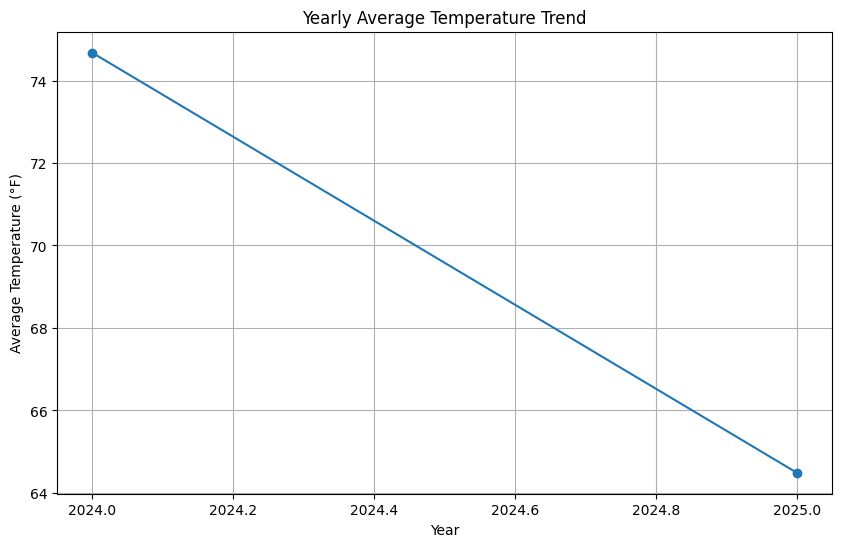

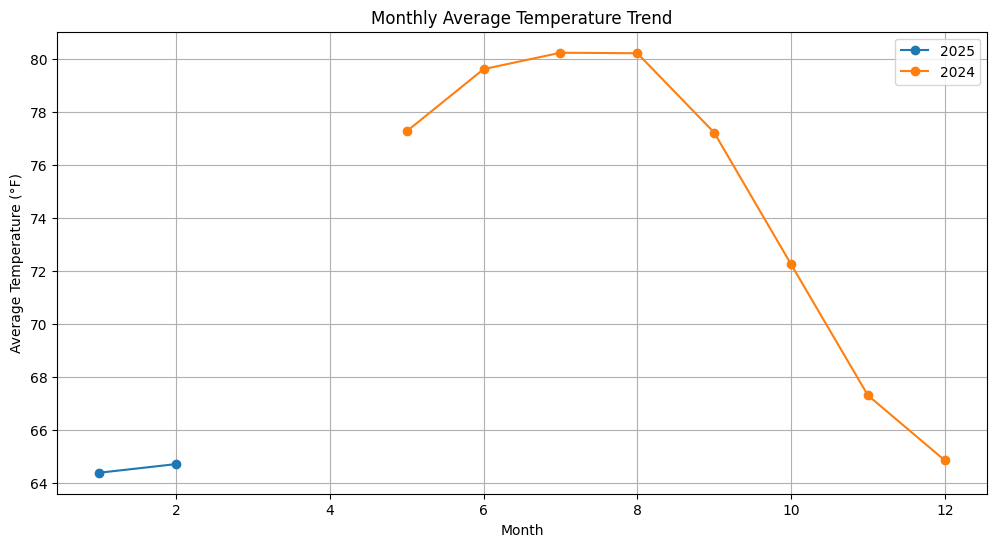

In [44]:
from pyspark.sql.functions import col, avg, to_date, month, year
# Group data by year and calculate average temperature
df_yearly_avg = df_cleaned.groupBy(year(col('date')).alias('year')).agg(avg(col('temperature_fahrenheit')).alias('avg_temp'))
 
# Show yearly average temperature
df_yearly_avg.show()
 
# Group data by month and calculate average temperature
df_monthly_avg = df_cleaned.groupBy(year(col('date')).alias('year'), month(col('date')).alias('month')).agg(avg(col('temperature_fahrenheit')).alias('avg_temp')).orderBy('month')
 
# Show monthly average temperature
df_monthly_avg.show()
 
# Convert DataFrame to Pandas for visualization
df_yearly_avg_pandas = df_yearly_avg.toPandas()
df_monthly_avg_pandas = df_monthly_avg.toPandas()
 
import matplotlib.pyplot as plt
 
# Plot yearly average temperature
plt.figure(figsize=(10, 6))
plt.plot(df_yearly_avg_pandas['year'], df_yearly_avg_pandas['avg_temp'], marker='o')
plt.title('Yearly Average Temperature Trend')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.grid(True)
plt.show()
 
# Plot monthly average temperature
plt.figure(figsize=(12, 6))
for year in df_monthly_avg_pandas['year'].unique():
    yearly_data = df_monthly_avg_pandas[df_monthly_avg_pandas['year'] == year]
    plt.plot(yearly_data['month'], yearly_data['avg_temp'], marker='o', label=str(year))
plt.title('Monthly Average Temperature Trend')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°F)')
plt.grid(True)
plt.legend()
plt.show()

+----+--------------------+
|year|          avg_precip|
+----+--------------------+
|2024|0.003560907544510...|
|2025|0.003035616388672...|
+----+--------------------+

+----+-----+--------------------+
|year|month|          avg_precip|
+----+-----+--------------------+
|2025|    1|0.003058608009470946|
|2025|    2|0.002991343328550711|
|2024|    5| 0.00412067913339039|
|2024|    6|0.003543998567194...|
|2024|    7|0.003936570448458...|
|2024|    8|0.003892473061472...|
|2024|    9| 0.00380635240224643|
|2024|   10|0.003270764067843309|
|2024|   11|0.003359119773028908|
|2024|   12|0.002838709632765172|
+----+-----+--------------------+



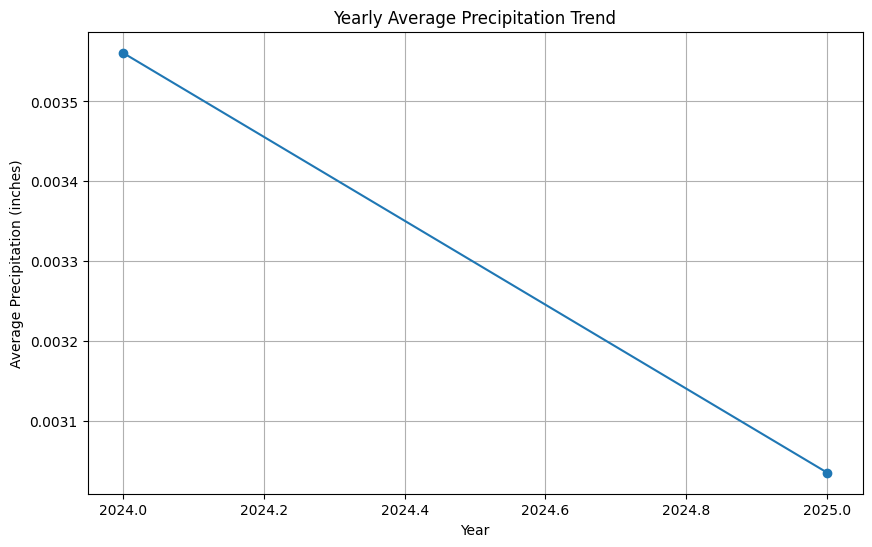

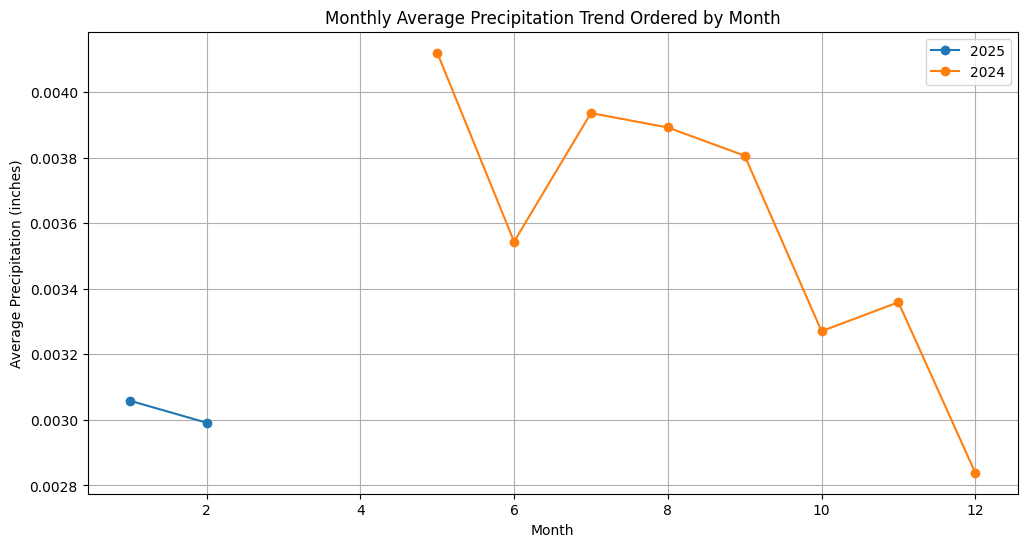

In [45]:
from pyspark.sql.functions import col, avg, to_date, month, year
# Group data by year and calculate average precipitation
df_yearly_avg = df_cleaned.groupBy(year(col('date')).alias('year')).agg(avg(col('precip_in')).alias('avg_precip'))
 
# Show yearly average precipitation
df_yearly_avg.show()
 
# Group data by year and month, calculate average precipitation, and order by month
df_monthly_avg = df_cleaned.groupBy(year(col('date')).alias('year'), month(col('date')).alias('month')).agg(avg(col('precip_in')).alias('avg_precip')).orderBy('month')
 
# Show monthly average precipitation ordered by month
df_monthly_avg.show()
 
# Convert DataFrame to Pandas for visualization
df_yearly_avg_pandas = df_yearly_avg.toPandas()
df_monthly_avg_pandas = df_monthly_avg.toPandas()
 
import matplotlib.pyplot as plt
 
# Plot yearly average precipitation
plt.figure(figsize=(10, 6))
plt.plot(df_yearly_avg_pandas['year'], df_yearly_avg_pandas['avg_precip'], marker='o')
plt.title('Yearly Average Precipitation Trend')
plt.xlabel('Year')
plt.ylabel('Average Precipitation (inches)')
plt.grid(True)
plt.show()
 
# Plot monthly average precipitation ordered by month
plt.figure(figsize=(12, 6))
for year in df_monthly_avg_pandas['year'].unique():
    yearly_data = df_monthly_avg_pandas[df_monthly_avg_pandas['year'] == year]
    plt.plot(yearly_data['month'], yearly_data['avg_precip'], marker='o', label=str(year))
plt.title('Monthly Average Precipitation Trend Ordered by Month')
plt.xlabel('Month')
plt.ylabel('Average Precipitation (inches)')
plt.grid(True)
plt.legend()
plt.show()

DataFrame[country: string, location_name: string, latitude: double, longitude: double, timezone: string, last_updated_epoch: int, last_updated: timestamp, temperature_celsius: double, temperature_fahrenheit: double, condition_text: string, wind_mph: double, wind_kph: double, wind_degree: int, wind_direction: string, pressure_mb: double, pressure_in: double, precip_mm: double, precip_in: double, humidity: int, cloud: int, feels_like_celsius: double, feels_like_fahrenheit: double, visibility_km: double, visibility_miles: double, uv_index: double, gust_mph: double, gust_kph: double, air_quality_Carbon_Monoxide: double, air_quality_Ozone: double, air_quality_Nitrogen_dioxide: double, air_quality_Sulphur_dioxide: double, air_quality_PM2.5: double, air_quality_PM10: double, air_quality_us-epa-index: int, air_quality_gb-defra-index: int, sunrise: string, sunset: string, moonrise: string, moonset: string, moon_phase: string, moon_illumination: int, date_only: date, date: date, year: int, month

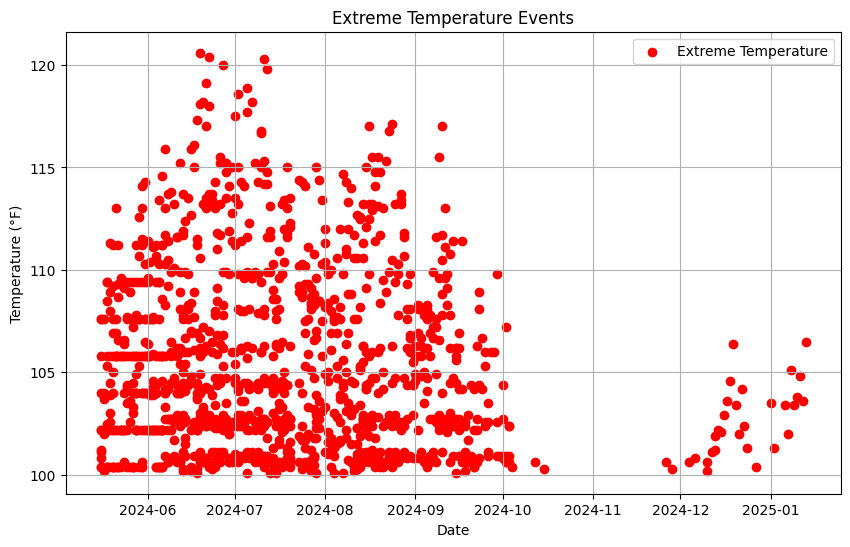

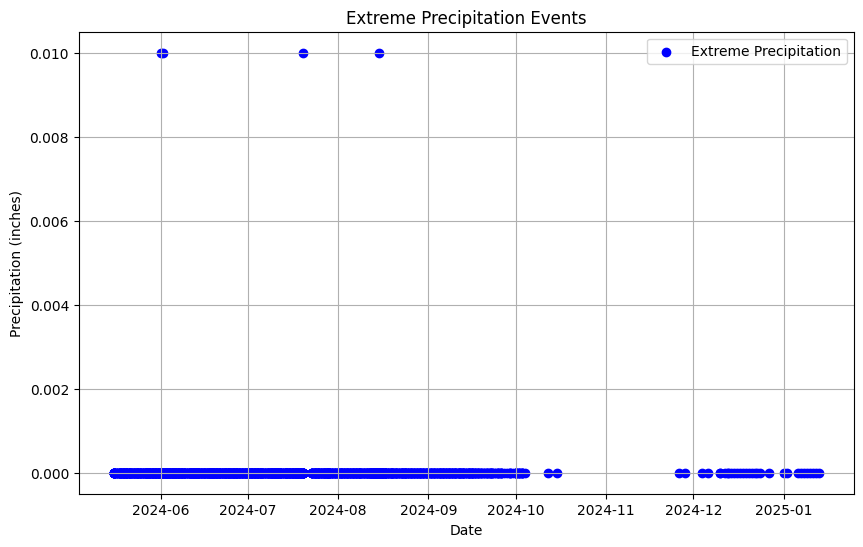

In [46]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, abs, mean, stddev, to_date, when
 
 
 
# Ensure the 'date' column is in date format
df_cleaned = df_cleaned.withColumn('date', to_date(col('date'), 'yyyy-MM-dd'))
 
# Define thresholds for extreme weather events
temp_threshold = 100.0  # Temperature in Fahrenheit
precip_threshold = 5.0  # Precipitation in inches
 
# Identify extreme temperature events
extreme_temp_events = df_cleaned.filter(col('temperature_fahrenheit') > temp_threshold)
 
# Identify extreme precipitation events
extreme_precip_events = df_cleaned.filter(col('precip_in') > precip_threshold)
 
# Combine extreme events
extreme_events = extreme_temp_events.union(extreme_precip_events)
 
# Add event type column
extreme_events = extreme_events.withColumn(
    'event_type',
    when(col('temperature_fahrenheit') > temp_threshold, 'Extreme Temperature')
    .when(col('precip_in') > precip_threshold, 'Extreme Precipitation')
)
 
# Show extreme events
display(extreme_events)
 
# Convert DataFrame to Pandas for visualization
extreme_events_pandas = extreme_events.toPandas()
 
import matplotlib.pyplot as plt
 
# Plot extreme temperature events
plt.figure(figsize=(10, 6))
plt.scatter(extreme_events_pandas['date'], extreme_events_pandas['temperature_fahrenheit'], color='red', label='Extreme Temperature')
plt.title('Extreme Temperature Events')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.grid(True)
plt.legend()
plt.show()
 
# Plot extreme precipitation events
plt.figure(figsize=(10, 6))
plt.scatter(extreme_events_pandas['date'], extreme_events_pandas['precip_in'], color='blue', label='Extreme Precipitation')
plt.title('Extreme Precipitation Events')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.grid(True)
plt.legend()
plt.show()

In [75]:
import psycopg2
import pandas as pd

# Define connection parameters
conn_params = {
    "host": "localhost",
    "database": "postgres",
    "user": "postgres",
    "password": "new_password"
}

# Create connection and cursor
conn = psycopg2.connect(**conn_params)
cur = conn.cursor()

# Query the locations table
cur.execute("SELECT id, location_name FROM locations")

# Fetch all rows
location_mapping = {location_name: id for id, location_name in cur.fetchall()}

# Close the cursor and connection
cur.close()
conn.close()


In [77]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

# Define a UDF to get location_id
def get_location_id(location_name):
    return location_mapping.get(location_name)

# Register the UDF
get_location_id_udf = udf(get_location_id, IntegerType())

# Add the location_id column to the DataFrame
df1 = df1.withColumn("location_id", get_location_id_udf(df1.location_name))


In [78]:
from pyspark.sql import SparkSession
import psycopg2

# Select unique locations
locations_df = df1.select("country", "location_name", "latitude", "longitude", "timezone").distinct()

# Collect data to driver
locations_data = locations_df.collect()

# Select weather observations data
weather_observations_df = df1.select("location_id", "last_updated", "last_updated_epoch", "date_only", 
                                                "temperature_celsius", "temperature_fahrenheit", "wind_mph", "wind_kph", 
                                                "wind_degree", "wind_direction", "pressure_mb", "pressure_in", 
                                                "precip_mm", "precip_in", "humidity", "cloud", "feels_like_celsius", 
                                                "feels_like_fahrenheit", "visibility_km", "visibility_miles", 
                                                "uv_index", "gust_mph", "gust_kph")

# Collect data to driver
weather_observations_data = weather_observations_df.collect()

# Similarly collect weather conditions data
weather_conditions_df = df1.select("weather_observation_id", "condition_text", "sunrise", "sunset", 
                                              "moonrise", "moonset", "moon_phase", "moon_illumination")

weather_conditions_data = weather_conditions_df.collect()

# Similarly collect air quality data
air_quality_df = df1.select("weather_observation_id", "air_quality_carbon_monoxide", "air_quality_ozone", 
                                       "air_quality_nitrogen_dioxide", "air_quality_sulphur_dioxide", "air_quality_pm25", 
                                       "air_quality_pm10", "air_quality_us_epa_index", "air_quality_gb_defra_index")

air_quality_data = air_quality_df.collect()


Py4JJavaError: An error occurred while calling o969.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 6 in stage 127.0 failed 1 times, most recent failure: Lost task 6.0 in stage 127.0 (TID 259) (host.docker.internal executor driver): org.apache.spark.SparkException: Python worker exited unexpectedly (crashed)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:612)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:594)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:38)
	at org.apache.spark.sql.execution.python.BasePythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:99)
	at org.apache.spark.sql.execution.python.BasePythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:75)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:491)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)
Caused by: java.io.EOFException
	at java.base/java.io.DataInputStream.readInt(DataInputStream.java:398)
	at org.apache.spark.sql.execution.python.BasePythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:83)
	... 26 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2414)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2433)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2458)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:448)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:4149)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4323)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4321)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4321)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:4146)
	at jdk.internal.reflect.GeneratedMethodAccessor120.invoke(Unknown Source)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:842)
Caused by: org.apache.spark.SparkException: Python worker exited unexpectedly (crashed)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:612)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:594)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:38)
	at org.apache.spark.sql.execution.python.BasePythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:99)
	at org.apache.spark.sql.execution.python.BasePythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:75)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:491)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	... 1 more
Caused by: java.io.EOFException
	at java.base/java.io.DataInputStream.readInt(DataInputStream.java:398)
	at org.apache.spark.sql.execution.python.BasePythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:83)
	... 26 more


In [63]:

# Create connection
conn = psycopg2.connect(**conn_params)
# Select weather observations data
weather_observations_df = df1.select("location_id", "last_updated", "last_updated_epoch", "date_only", 
                                                "temperature_celsius", "temperature_fahrenheit", "wind_mph", "wind_kph", 
                                                "wind_degree", "wind_direction", "pressure_mb", "pressure_in", 
                                                "precip_mm", "precip_in", "humidity", "cloud", "feels_like_celsius", 
                                                "feels_like_fahrenheit", "visibility_km", "visibility_miles", 
                                                "uv_index", "gust_mph", )

# Collect data to driver
weather_observations_data = weather_observations_df.collect()


# Create a cursor
cur = conn.cursor()

# Define insert query for weather_observations
insert_query = """
    INSERT INTO weather_observations (location_id, last_updated, last_updated_epoch, date_only, temperature_celsius, temperature_fahrenheit,
                                      wind_mph, wind_kph, wind_degree, wind_direction, pressure_mb, pressure_in, precip_mm, precip_in, 
                                      humidity, cloud, feels_like_celsius, feels_like_fahrenheit, visibility_km, visibility_miles, uv_index, 
                                      gust_mph, gust_kph)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Insert each row of the DataFrame into the table
for index, row in weather_observations_df.iterrows():
    cur.execute(insert_query, (row['location_id'], row['last_updated'], row['last_updated_epoch'], row['date_only'],
                               row['temperature_celsius'], row['temperature_fahrenheit'], row['wind_mph'], row['wind_kph'], row['wind_degree'],
                               row['wind_direction'], row['pressure_mb'], row['pressure_in'], row['precip_mm'], row['precip_in'], row['humidity'],
                               row['cloud'], row['feels_like_celsius'], row['feels_like_fahrenheit'], row['visibility_km'], row['visibility_miles'],
                               row['uv_index'], row['gust_mph'], row['gust_kph']))

# Commit the transaction
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()

print("Data inserted successfully into weather_observations!")

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `location_id` cannot be resolved. Did you mean one of the following? [`location_name`, `date_only`, `latitude`, `cloud`, `date`].;
'Project ['location_id, last_updated#3034, last_updated_epoch#3033, date_only#3069, temperature_celsius#3035, temperature_fahrenheit#3036, wind_mph#3038, wind_kph#3039, wind_degree#3040, wind_direction#3041, pressure_mb#3042, pressure_in#3043, precip_mm#3044, precip_in#3045, humidity#3046, cloud#3047, feels_like_celsius#3048, feels_like_fahrenheit#3049, visibility_km#3050, visibility_miles#3051, uv_index#3052, gust_mph#3053]
+- Relation [country#3028,location_name#3029,latitude#3030,longitude#3031,timezone#3032,last_updated_epoch#3033,last_updated#3034,temperature_celsius#3035,temperature_fahrenheit#3036,condition_text#3037,wind_mph#3038,wind_kph#3039,wind_degree#3040,wind_direction#3041,pressure_mb#3042,pressure_in#3043,precip_mm#3044,precip_in#3045,humidity#3046,cloud#3047,feels_like_celsius#3048,feels_like_fahrenheit#3049,visibility_km#3050,visibility_miles#3051,... 22 more fields] csv


In [66]:
# Define connection parameters
conn_params = {
    "host": "localhost",
    "database": "postgres",
    "user": "postgres",
    "password": "new_password"
}

# Create connection
conn = psycopg2.connect(**conn_params)

# Create a cursor
cur = conn.cursor()

# Define insert query for locations
insert_query = """
    INSERT INTO locations (country, location_name, latitude, longitude, timezone)
    VALUES (%s, %s, %s, %s, %s)
"""

# Insert each row of the collected data into the table
for row in locations_data:
    cur.execute(insert_query, (row['country'], row['location_name'], row['latitude'], row['longitude'], row['timezone']))

# Commit the transaction
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()

print("Data inserted successfully into locations!")


Data inserted successfully into locations!


In [69]:
# Create connection and cursor as before
conn = psycopg2.connect(**conn_params)
cur = conn.cursor()

# Define insert query for weather_observations
insert_query = """
    INSERT INTO weather_observations (id, last_updated, last_updated_epoch, date_only, temperature_celsius, temperature_fahrenheit,
                                      wind_mph, wind_kph, wind_degree, wind_direction, pressure_mb, pressure_in, precip_mm, precip_in, 
                                      humidity, cloud, feels_like_celsius, feels_like_fahrenheit, visibility_km, visibility_miles, uv_index, 
                                      gust_mph, gust_kph)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Insert each row of the collected data into the table
for row in weather_observations_data:
    cur.execute(insert_query, (row['id'], row['last_updated'], row['last_updated_epoch'], row['date_only'],
                               row['temperature_celsius'], row['temperature_fahrenheit'], row['wind_mph'], row['wind_kph'], row['wind_degree'],
                               row['wind_direction'], row['pressure_mb'], row['pressure_in'], row['precip_mm'], row['precip_in'], row['humidity'],
                               row['cloud'], row['feels_like_celsius'], row['feels_like_fahrenheit'], row['visibility_km'], row['visibility_miles'],
                               row['uv_index'], row['gust_mph'], row['gust_kph']))

# Commit the transaction
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()

print("Data inserted successfully into weather_observations!")


NameError: name 'weather_observations_data' is not defined

In [68]:
# Create connection and cursor as before
conn = psycopg2.connect(**conn_params)
cur = conn.cursor()

# Define insert query for weather_conditions
insert_query = """
    INSERT INTO weather_conditions (weather_observation_id, condition_text, sunrise, sunset, moonrise, moonset, moon_phase, moon_illumination)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
"""

# Insert each row of the collected data into the table
for row in weather_conditions_data:
    cur.execute(insert_query, (row['weather_observation_id'], row['condition_text'], row['sunrise'], row['sunset'],
                               row['moonrise'], row['moonset'], row['moon_phase'], row['moon_illumination']))

# Commit the transaction
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()

print("Data inserted successfully into weather_conditions!")


NameError: name 'weather_conditions_data' is not defined

In [ ]:
# Create connection and cursor as before
conn = psycopg2.connect(**conn_params)
cur = conn.cursor()

# Define insert query for air_quality
insert_query = """
    INSERT INTO air_quality (weather_observation_id, air_quality_carbon_monoxide, air_quality_ozone, air_quality_nitrogen_dioxide,
                             air_quality_sulphur_dioxide, air_quality_pm25, air_quality_pm10, air_quality_us_epa_index, air_quality_gb_defra_index)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Insert each row of the collected data into the table
for row in air_quality_data:
    cur.execute(insert_query, (row['weather_observation_id'], row['air_quality_carbon_monoxide'], row['air_quality_ozone'],
                               row['air_quality_nitrogen_dioxide'], row['air_quality_sulphur_dioxide'], row['air_quality_pm25'],
                               row['air_quality_pm10'], row['air_quality_us_epa_index'], row['air_quality_gb_defra_index']))

# Commit the transaction
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()

print("Data inserted successfully into air_quality!")
